## **Getting the notebook ready for analysis**

In [ ]:
# -- connect your Google Drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# -- install sodapy
!pip install sodapy

In [ ]:
# -- useful imports
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import sodapy

## **Reading in data**

In [ ]:
# -- read in a data file from a URL (example: NOAA sea level)
fname = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"
noaa  = pd.read_csv(fname, skiprows=5, sep=",", lineterminator="\n")

In [ ]:
# -- read in data from your Google Drive (example: World Bank)
fname = "drive/My Drive/Data_Science/dstep20/data/world_bank/world_bank_gdp_leb.csv"
wbdat = pd.read_csv(fname)

In [ ]:
# -- read in a data from a Socrata Open Data base (example: NYC DSNY)
dom     = "data.cityofnewyork.us"
dsid    = "ebb7-mvp5"
lim     = 100000
app_tok = None
client  = sodapy.Socrata(dom, app_tok, timeout=120)
result  = client.get(dsid, limit=lim)
dsny    = pd.DataFrame.from_records(result)

In [ ]:
dsny.head()

,month,borough,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,resorganicstons,xmastreetons,borough_id,schoolorganictons,leavesorganictons
0,2020 / 01,Bronx,01,491.720000000000027,34.189999999999998,39.509999999999998,0.880000000000000,3.400000000000000,2,NaN,NaN
1,2020 / 01,Bronx,02,361.280000000000030,33.869999999999997,43.020000000000003,NaN,NaN,2,NaN,NaN
2,2020 / 01,Bronx,03,487.629999999999995,29.420000000000002,46.710000000000001,NaN,2.100000000000000,2,NaN,NaN
3,2020 / 01,Bronx,04,979.070000000000050,61.780000000000001,110.280000000000001,2.680000000000000,1.000000000000000,2,NaN,NaN
4,2020 / 01,Bronx,05,840.940000000000055,54.689999999999998,92.829999999999998,NaN,2.000000000000000,2,NaN,NaN


## **Accessing data in DataFrames**

In [ ]:
# -- access a single column from a DataFrame
gdp = wbdat["gdp2017"]

In [ ]:
# -- access multiple columns from a DataFrame
cols    = ["gdp2017", "leb2017"]
gdp_leb = wbdat[cols]

In [ ]:
# -- set the values in a column (or create the column if it doesn't exist)
wbdat["log_gdp"] = np.log10(wbdat["gdp2017"])

In [ ]:
# -- convert columns in DataFrame to different data types
dsny["communitydistrict"]   = dsny["communitydistrict"].astype(int)
dsny["refusetonscollected"] = dsny["refusetonscollected"].astype(float)

In [ ]:
dsny.head()

,month,borough,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,resorganicstons,xmastreetons,borough_id,schoolorganictons,leavesorganictons
0,2020 / 01,Bronx,1,491.72,34.189999999999998,39.509999999999998,0.880000000000000,3.400000000000000,2,NaN,NaN
1,2020 / 01,Bronx,2,361.28,33.869999999999997,43.020000000000003,NaN,NaN,2,NaN,NaN
2,2020 / 01,Bronx,3,487.63,29.420000000000002,46.710000000000001,NaN,2.100000000000000,2,NaN,NaN
3,2020 / 01,Bronx,4,979.07,61.780000000000001,110.280000000000001,2.680000000000000,1.000000000000000,2,NaN,NaN
4,2020 / 01,Bronx,5,840.94,54.689999999999998,92.829999999999998,NaN,2.000000000000000,2,NaN,NaN


## **Sub-selecting data in DataFrames**

In [ ]:
# -- sub-select only DSNY data in Manhattan
dsny_sub = dsny[dsny["borough"] == "Manhattan"]

In [ ]:
# -- sub-select only DSNY data in Manhattan and in Community District 3
ind_boro  = dsny["borough"] == "Manhattan"
ind_comd  = dsny["communitydistrict"] == 3
ind_tot   = ind_boro & ind_comd
dsny_sub2 = dsny[ind_tot]

In [ ]:
# -- use a string function to select only boroughs that contain "Br"
ind_str   = dsny["borough"].str.contains("Br")
dsny_sub3 = dsny[ind_str]

In [ ]:
# -- print the value of the Refuse column and 6th row
dsny["refusetonscollected"].iloc[6]

889.09

In [ ]:
# -- sub-select the 3rd through 5th column and 10th through 17th row
dsny_sub4 = dsny[dsny.columns[3:6]].iloc[10:18]

In [ ]:
display(dsny.head())
display(dsny_sub4.head())

,month,borough,communitydistrict,refusetonscollected,papertonscollected,mgptonscollected,resorganicstons,xmastreetons,borough_id,schoolorganictons,leavesorganictons
0,2020 / 01,Bronx,1,491.72,34.189999999999998,39.509999999999998,0.880000000000000,3.400000000000000,2,NaN,NaN
1,2020 / 01,Bronx,2,361.28,33.869999999999997,43.020000000000003,NaN,NaN,2,NaN,NaN
2,2020 / 01,Bronx,3,487.63,29.420000000000002,46.710000000000001,NaN,2.100000000000000,2,NaN,NaN
3,2020 / 01,Bronx,4,979.07,61.780000000000001,110.280000000000001,2.680000000000000,1.000000000000000,2,NaN,NaN
4,2020 / 01,Bronx,5,840.94,54.689999999999998,92.829999999999998,NaN,2.000000000000000,2,NaN,NaN


,refusetonscollected,papertonscollected,mgptonscollected
10,718.77,91.469999999999999,105.049999999999997
11,862.80,114.129999999999995,172.390000000000015
12,1360.44,157.659999999999997,119.140000000000001
13,628.54,130.810000000000002,99.850000000000009
14,982.13,112.680000000000007,107.570000000000007


## **Manipulating data in DataFrames**

In [ ]:
# -- finding top 10 GDP in World Bank data
top10 = wbdat.sort_values("gdp2017", ascending=False)[:10]

In [ ]:
# -- group DSNY data by borough and sum to get total refuse
dsny_grp = dsny.groupby("borough").sum()
nyc_tot  = dsny_grp["refusetonscollected"].reset_index()

In [ ]:
dsny_grp.head()

,communitydistrict,refusetonscollected
borough,,
Bronx,27137,12435933.72
Brooklyn,59036,24130104.66
Manhattan,27545,13915589.03
Queens,36744,21378810.59
Staten Island,2138,5553547.77


In [ ]:
nyc_tot

,borough,refusetonscollected
0,Bronx,12435933.72
1,Brooklyn,24130104.66
2,Manhattan,13915589.03
3,Queens,21378810.59
4,Staten Island,5553547.77


In [ ]:
# -- take minimum across columns
cols = ["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]
minlev = noaa[cols].min(axis=1)
noaa["minlev"] = minlev

In [ ]:
noaa.head()

,year,TOPEX/Poseidon,Jason-1,Jason-2,Jason-3,minlev
0,1992.9614,-19.54,NaN,NaN,NaN,-19.54
1,1992.9865,-19.96,NaN,NaN,NaN,-19.96
2,1993.0123,-15.62,NaN,NaN,NaN,-15.62
3,1993.0407,-19.43,NaN,NaN,NaN,-19.43
4,1993.0660,-23.95,NaN,NaN,NaN,-23.95


## **Plotting data**

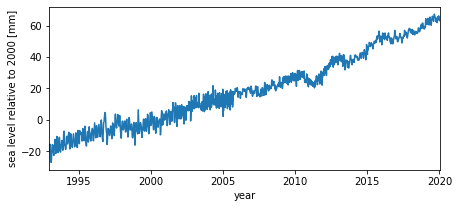

In [ ]:
# -- make a line plot with proper axis labels
ax   = noaa.plot("year", "minlev", figsize=[7, 3], legend=False)
xlab = ax.set_xlabel("year")
ylab = ax.set_ylabel("sea level relative to 2000 [mm]")

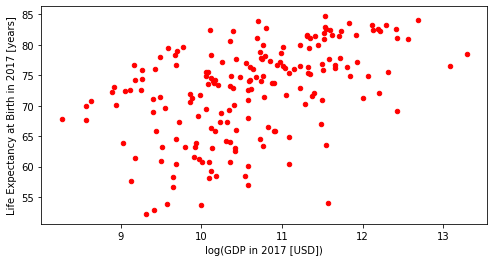

In [ ]:
# -- make a scatter plot with proper axis labels
ax = wbdat.plot.scatter("log_gdp", "leb2017", color="red", figsize=[8, 4])
xlab = ax.set_xlabel("log(GDP in 2017 [USD])")
ylab = ax.set_ylabel("Life Expectancy at Birth in 2017 [years]")

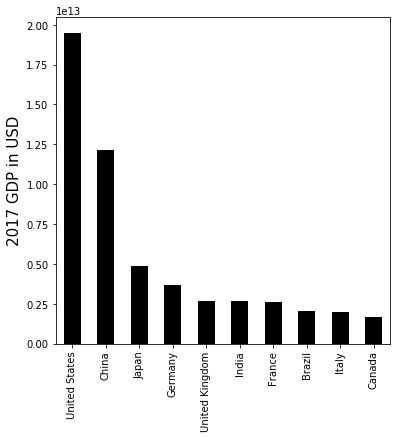

In [ ]:
# -- make a bar chart with proper axis labels
ax   = top10.plot.bar("country", "gdp2017", color="k", legend=False, figsize=[6, 6])
xlab = ax.set_xlabel("")
ylab = ax.set_ylabel("2017 GDP in USD", fontsize=15)

In [ ]:
pip install jupyternotify

In [ ]:
%load_ext jupyternotify

ModuleNotFoundError: ignored

In [3]:
!jupyter nbextension list
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable codefolding/main
!jupyter nbextension list

Known nbextensions:
  config dir: /root/.jupyter/nbconfig
    notebook section
      codefolding/main  enabled 
      - Validating: problems found:
        - require?  X codefolding/main
     |████████████████████████████████| 20.9MB 228kB/s 
     |████████████████████████████████| 870kB 38.8MB/s 
     |████████████████████████████████| 481kB 49.4MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=19ca81e21b318f86264f2cac7dc8b96feb2e9c8918165d806e5a8e74f05baa06
  Stored in directory: /root/.cache/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465823 sha256=595d01ba0fe2617c28c52875144daad3a23118ece448647b59db17ce6f193bcc
  Stored in directory: /root/.cache/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
Successfully built jupyter-latex-envs jupyt

In [ ]:
for i in range(20):
  b = i % 3
  c = b + 5
  print(b, c, end=' | ')


In [1]:
!jupyter nbextension list

Known nbextensions:


In [ ]:
#@title
!jupyter nbextension enable hinterland/hinterland

In [ ]:
!pip install jupyter_contrib_nbextensions

In [ ]:
!git clone git://github.com/teticio/nbextension-gotoerror

In [ ]:
!jupyter nbextension install nbextension-gotoerror

In [ ]:
!jupyter nbextension enable nbextension-gotoerror/main

In [ ]:
!python -m site

In [ ]:
!ln -s /usr/local/lib/python3.6/dist-packages dist-packages

In [ ]:
pd.read_clipboard('bawlbjiewbj')

In [ ]:
fred = 234 #@param {type : 'number'}

In [ ]:
pip install jupyter_nbextensions_configurator 

In [ ]:
!jupyter contrib nbextension install --user

In [ ]:
!jupyter nbextensions_configurator enable --user


In [ ]:
!jupyter nbextension enable nbextensions_configurator --sys-prefix

In [ ]:
cat /root/.jupyter/nbconfig/notebook.json

In [ ]:
! pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
! pip install jupyter_nbextensions_configurator
! jupyter contrib nbextension install --user
! jupyter nbextensions_configurator enable --user

In [ ]:
!jupyter nbextension enable codefolding/main

In [ ]:
#pip install jupyter_contrib_nbextensions --upgrade
!jupyter contrib nbextension install --sys-prefix

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!jupyter nbextension enable varInspector/main

In [ ]:
!jupyter nbextensions_configurator enable --system

In [ ]:
!jupyter nbextension enable scratchpad/main --sys-prefi

Enabling notebook extension scratchpad/main...
      - Validating: OK


In [ ]:
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user

In [ ]:
!jupyter nbextension enable varInspector/main

Enabling notebook extension varInspector/main...
      - Validating: OK


In [ ]:
a = 3

In [ ]:
%load_ext google.colab.data_table

In [ ]:
from vega_datasets import data
data.cars()

In [ ]:
%unload_ext google.colab.data_table

In [ ]:
data.cars()